In [7]:
import rasterio #Rasteerio is a library for reading and writing geospatial raster data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("..")  # go up from /scripts to /


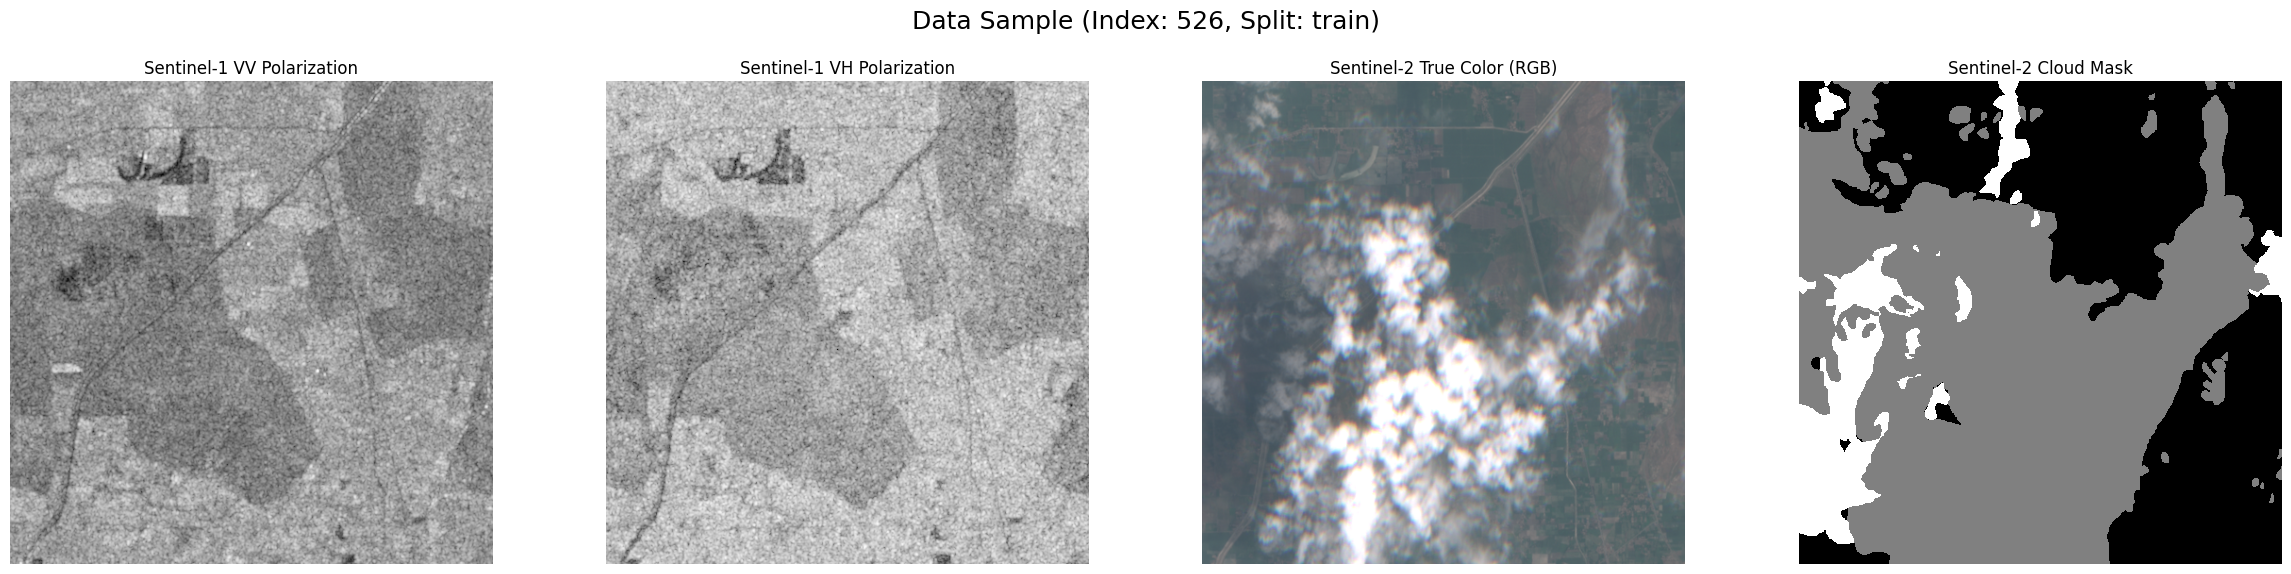

In [54]:
def visualize_sample(mainfest_path, sample_idx=0):
    '''
    Visualizes a sample from the manifest file.
    Args:
        mainfest_path (str): Path to the manifest file.
        sample_idx (int): Index of the sample to visualize.
    '''
    df = pd.read_csv(mainfest_path)
    sample = df.iloc[sample_idx]

    #Load SAR data
    with rasterio.open(sample['s1_vv']) as src:
        s1_vv = src.read(1)
    with rasterio.open(sample['s1_vh']) as src:
        s1_vh = src.read(1)


    #Load optical data
    with rasterio.open(sample['s2_b4_red']) as src:
        s2_r = src.read(1)
    with rasterio.open(sample['s2_b3_green']) as src:
        s2_g = src.read(1)
    with rasterio.open(sample['s2_b2_blue']) as src:
        s2_b = src.read(1)

    #stack to creater RGB image
    s2_rgb = np.dstack((s2_r, s2_g, s2_b))
    s2_rgb = np.clip(s2_rgb / 4000.0, 0, 1)  # Normalize the RGB values

    #Load cloud Mask
    with rasterio.open(sample['s2_cloudmask']) as src:
        s2_cloud_mask = src.read(1)

    #plotting
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    fig.suptitle(f"Data Sample (Index: {sample_idx}, Split: {sample['split']})", fontsize=18)

     # Plot 1: Sentinel-1 VV
    axes[0].imshow(s1_vv, cmap='gray')
    axes[0].set_title("Sentinel-1 VV Polarization")
    axes[0].axis('off')

    # Plot 2: Sentinel-1 VH
    axes[1].imshow(s1_vh, cmap='gray')
    axes[1].set_title("Sentinel-1 VH Polarization")
    axes[1].axis('off')

    # Plot 3: Sentinel-2 RGB
    axes[2].imshow(s2_rgb)
    axes[2].set_title("Sentinel-2 True Color (RGB)")
    axes[2].axis('off')

    # Plot 4: Sentinel-2 Cloud Mask
    axes[3].imshow(s2_cloud_mask, cmap='gray', interpolation='none')
    axes[3].set_title("Sentinel-2 Cloud Mask")
    axes[3].axis('off')

    plt.tight_layout(rect=(0, 0.03, 1, 0.95)) # Adjust layout to make room for suptitle
    plt.show()


if __name__ == "__main__":
    MANIFEST_PATH = "data/processed/data_manifest.csv"
    # data\processed\data_manifest.csv
    visualize_sample(MANIFEST_PATH, sample_idx=526)
